In [2]:
%pip install openpyxl==2.6.4

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import io
import collections
import pandas as pd
import matplotlib.pyplot as plt
from rdflib import ConjunctiveGraph
from rdflib.plugins.sparql.results.csvresults import CSVResultSerializer

pd.set_option('display.max_colwidth', 200)

if not os.path.exists('outputs'):
    os.makedirs('outputs')
    
g = ConjunctiveGraph()
g.parse('data.trig', format='trig')

def query(q):
    serializer = CSVResultSerializer(g.query(q))
    output = io.BytesIO()
    serializer.serialize(output)
    return pd.read_csv(io.StringIO(output.getvalue().decode('utf-8')), encoding='utf-8')
    
def write(df, fn):
    df.to_excel('outputs/{}'.format(fn), encoding='utf-8')

In [5]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?date ?ri_acronym ?ri_website ?ri_domain ?rep_label WHERE {
    ?g dcterms:date ?date .
    GRAPH ?g { 
        ?ri a rm:ResearchInfrastructure .
        ?ri envri:acronym ?ri_acronym . 
        ?ri envri:website ?ri_website .
        ?ri envri:hasDomain ?ri_domain .
        ?ri envri:hasRepository ?rep .
        ?rep a envri:Repository .
        ?rep rdfs:label ?rep_label .
    }
    # FILTER (?date > "2019-01-01"^^xsd:date)
    FILTER (?ri_acronym = "ICOS")
}
""")

display(q)
write(q, 'output-1repos.xlsx')

,date,ri_acronym,ri_website,ri_domain,rep_label
0,2019-04-01,ICOS,http://www.icos-cp.eu,n65,Carbon Portal


In [6]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?rep_label ?vocab_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasVocabularies [
           envri:hasName ?vocab_name ;
         ]
       ]
}
""")

display(q)
write(q, 'output-2.xlsx')

,rep_label,vocab_name
0,Carbon Portal,PROV-O
1,Carbon Portal,ICOS
2,Carbon Portal,Darwin Core
3,ANAEE-France Metadata Catalog,ANAEETHES
4,norwegian Meteorological Institute,http://envri.eu/ns/NULL
5,DEIMS-SDR,EnvThes
6,norwegian Polar Data Centre,CF standard names
7,LifeWatch Italy Portal,LW Endemisms
8,LifeWatch Italy Portal,LW MacroZooBenthos Traits
9,LifeWatch Italy Portal,LW MacroAlgae


In [7]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>

SELECT ?p WHERE {
    ?p envri:relatesTo fairterms:A1.2 .
}
""")

display(q)
write(q, 'output-3.xlsx')

,p
0,http://envri.eu/ns/maintainsOwnUserDatabase
1,http://envri.eu/ns/usesAuthorisationTechnique
2,http://envri.eu/ns/contentAccessAuthorizationRequired
3,http://envri.eu/ns/hasAuthenticationMethod


In [8]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-4.xlsx')

,l,p,o,li
0,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/hasHarvestingMethods,n190,http://www.wikidata.org/entity/Q661823
1,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/hasHarvestingMethods,n190,http://envri.eu/ns/OAI-PMH
2,SIOS norwegian Meteorological Institute metadata,http://envri.eu/ns/hasHarvestingMethods,n166,http://envri.eu/ns/OAI-PMH
3,SIOS norwegian Polar Data Centre metadata,http://envri.eu/ns/hasHarvestingMethods,n137,http://envri.eu/ns/OAI-PMH
4,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/hasHarvestingMethods,n231,https://www.wikidata.org/entity/Q1494741
...,...,...,...,...
85,SIOS norwegian Meteorological Institute metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q2115,NaN
86,SIOS norwegian Polar Data Centre metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q2063,NaN
87,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q192588,NaN
88,ICOS Carbon Portal metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q54872,NaN


In [9]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?rep_label ?schema_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasMetadata [
           envri:hasSchema [
             envri:hasSchemaName ?schema_name
           ]
         ]
       ]
}
""")

display(q)
write(q, 'output-5.xlsx')

,rep_label,schema_name
0,Carbon Portal,https://www.wikidata.org/entity/Q50377276
1,Carbon Portal,http://envri.eu/ns/GeoDCAT
2,ANAEE-France Metadata Catalog,https://www.wikidata.org/entity/Q30079268
3,ANAEE-France Metadata Catalog,https://www.wikidata.org/entity/Q50377276
4,norwegian Meteorological Institute,https://www.wikidata.org/entity/Q50377276
5,DEIMS-SDR,https://www.wikidata.org/entity/Q7451082
6,DEIMS-SDR,https://www.wikidata.org/entity/Q30079268
7,DEIMS-SDR,http://envri.eu/ns/INSPIRE_EF
8,DEIMS-SDR,https://www.wikidata.org/entity/Q50377276
9,DEIMS-SDR,http://envri.eu/ns/EML2.0


In [10]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-I1_metadata.xlsx')

,l,p,o,li
0,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/hasHarvestingMethods,n190,http://www.wikidata.org/entity/Q661823
1,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/hasHarvestingMethods,n190,http://envri.eu/ns/OAI-PMH
2,SIOS norwegian Meteorological Institute metadata,http://envri.eu/ns/hasHarvestingMethods,n166,http://envri.eu/ns/OAI-PMH
3,SIOS norwegian Polar Data Centre metadata,http://envri.eu/ns/hasHarvestingMethods,n137,http://envri.eu/ns/OAI-PMH
4,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/hasHarvestingMethods,n231,https://www.wikidata.org/entity/Q1494741
...,...,...,...,...
85,SIOS norwegian Meteorological Institute metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q2115,NaN
86,SIOS norwegian Polar Data Centre metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q2063,NaN
87,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q192588,NaN
88,ICOS Carbon Portal metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q54872,NaN


In [11]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A1persistency.xlsx')

,l,p,o,li
0,eLTER repository,http://envri.eu/ns/hasPersistencyGuaranty,http://envri.eu/ns/planned,NaN
1,LifeWatch repository,http://envri.eu/ns/hasPersistencyGuaranty,25 years,NaN
2,ANAEE-France repository,http://envri.eu/ns/hasPersistencyGuaranty,http://envri.eu/ns/planned,NaN
3,eLTER repository,http://envri.eu/ns/hasPersistencyGuaranty,ownership,NaN
4,eLTER repository,http://envri.eu/ns/hasPersistencyGuaranty,http://envri.eu/ns/planned,NaN
5,ICOS repository,http://envri.eu/ns/hasPersistencyGuaranty,20 years,NaN
6,SIOS norwegian Meteorological Institute data processing,http://envri.eu/ns/otherAnalysisServicesOffered,http://envri.eu/ns/none,NaN
7,ICOS Carbon Portal data processing,http://envri.eu/ns/otherAnalysisServicesOffered,n86,http://envri.eu/ns/JupiterNotebooks
8,LifeWatch LifeWatch Italy Portal data processing,http://envri.eu/ns/otherAnalysisServicesOffered,n227,https://www.wikidata.org/entity/Q2055062
9,eLTER DEIMS-SDR data processing,http://envri.eu/ns/otherAnalysisServicesOffered,http://envri.eu/ns/none,NaN


In [12]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A2nix.xlsx')

,l,p,o,li


In [13]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A1.1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A1_1access.xlsx')

,l,p,o,li
0,SIOS norwegian Meteorological Institute access mechanism,http://envri.eu/ns/AccessWithoutCosts,true,NaN
1,eLTER DEIMS-SDR access mechanism,http://envri.eu/ns/AccessWithoutCosts,true,NaN
2,eLTER EUDAT/FZJ B2SHARE access mechanism,http://envri.eu/ns/AccessWithoutCosts,access without costs,NaN
3,SIOS norwegian Polar Data Centre access mechanism,http://envri.eu/ns/AccessWithoutCosts,true,NaN
4,ICOS Carbon Portal access mechanism,http://envri.eu/ns/AccessWithoutCosts,true,NaN
5,LifeWatch LifeWatch Italy Portal access mechanism,http://envri.eu/ns/AccessWithoutCosts,true,NaN
6,ANAEE-France ANAEE-France Metadata Catalog access mechanism,http://envri.eu/ns/AccessWithoutCosts,true,NaN
7,SIOS norwegian Meteorological Institute access mechanism,http://envri.eu/ns/supportsAccessTechnology,file:///home/jovyan/report/fairness-assessment/http,NaN
8,eLTER DEIMS-SDR access mechanism,http://envri.eu/ns/supportsAccessTechnology,http://envri.eu/ns/LocalLDAP,NaN
9,eLTER EUDAT/FZJ B2SHARE access mechanism,http://envri.eu/ns/supportsAccessTechnology,http://envri.eu/ns/LocalLDAP,NaN


In [14]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A1.2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A1_2accesstechn.xlsx')

,l,p,o,li
0,SIOS norwegian Meteorological Institute access mechanism,http://envri.eu/ns/maintainsOwnUserDatabase,false,NaN
1,eLTER DEIMS-SDR access mechanism,http://envri.eu/ns/maintainsOwnUserDatabase,true,NaN
2,eLTER EUDAT/FZJ B2SHARE access mechanism,http://envri.eu/ns/maintainsOwnUserDatabase,true,NaN
3,SIOS norwegian Polar Data Centre access mechanism,http://envri.eu/ns/maintainsOwnUserDatabase,true,NaN
4,ICOS Carbon Portal access mechanism,http://envri.eu/ns/maintainsOwnUserDatabase,true,NaN
5,LifeWatch LifeWatch Italy Portal access mechanism,http://envri.eu/ns/maintainsOwnUserDatabase,true,NaN
6,ANAEE-France ANAEE-France Metadata Catalog access mechanism,http://envri.eu/ns/maintainsOwnUserDatabase,true,NaN
7,SIOS norwegian Meteorological Institute access mechanism,http://envri.eu/ns/usesAuthorisationTechnique,http://envri.eu/ns/none-open,NaN
8,SIOS norwegian Polar Data Centre access mechanism,http://envri.eu/ns/usesAuthorisationTechnique,http://envri.eu/ns/none-open,NaN
9,ICOS Carbon Portal access mechanism,http://envri.eu/ns/usesAuthorisationTechnique,https://www.wikidata.org/entity/Q743238,NaN


In [15]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-I2vocab.xlsx')

,l,p,o,li
0,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,true,NaN
1,SIOS norwegian Meteorological Institute metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,http://envri.eu/ns/none,NaN
2,SIOS norwegian Polar Data Centre metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,http://envri.eu/ns/none,NaN
3,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,true,NaN
4,ICOS Carbon Portal metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,true,NaN
5,eLTER DEIMS-SDR metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,partially,NaN
6,ANAEE-France ANAEE-France Metadata Catalog vocabularies,http://envri.eu/ns/hasVocabularyIri,http://agroportal.lirmm.fr/ontologies/ANAEETHES,NaN
7,LifeWatch LifeWatch Italy Portal vocabularies,http://envri.eu/ns/hasVocabularyIri,http://thesauri.lifewatchitaly.eu/fishTraits/,NaN
8,eLTER eLTER CDN vocabularies,http://envri.eu/ns/hasVocabularyIri,http://vocabs.lter-europe.net/EnvThes/,NaN
9,ICOS Carbon Portal vocabularies,http://envri.eu/ns/hasVocabularyIri,http://www.w3.org/ns/prov,NaN


In [16]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I3 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-I3.xlsx')

,l,p,o,li


In [17]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1.xlsx')

,l,p,o,li


In [18]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1.1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1_1_license.xlsx')

,l,p,o,li
0,SIOS norwegian Meteorological Institute access mechanism,http://envri.eu/ns/dataLicenseIri,https://www.met.no/en/free-meteorological-data/Licensing-and-crediting,NaN
1,ICOS Carbon Portal access mechanism,http://envri.eu/ns/dataLicenseIri,https://creativecommons.org/licenses/by/4.0/,NaN
2,LifeWatch LifeWatch Italy Portal access mechanism,http://envri.eu/ns/dataLicenseIri,http://envri.eu/ns/none,NaN
3,LifeWatch repository,http://envri.eu/ns/hasPolicies,http://envri.eu/ns/planned,NaN
4,ANAEE-France repository,http://envri.eu/ns/hasPolicies,http://envri.eu/ns/none,NaN
5,eLTER repository,http://envri.eu/ns/hasPolicies,http://envri.eu/ns/none,NaN
6,SIOS repository,http://envri.eu/ns/hasPolicies,http://envri.eu/ns/none,NaN
7,ICOS repository,http://envri.eu/ns/hasPolicies,n97,http://envri.eu/ns/Usage
8,SIOS norwegian Meteorological Institute access mechanism,http://envri.eu/ns/openAccessMetadata,true,NaN
9,eLTER DEIMS-SDR access mechanism,http://envri.eu/ns/openAccessMetadata,true,NaN


In [19]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1.2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1_2prov.xlsx')

,l,p,o,li
0,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
1,SIOS norwegian Meteorological Institute metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
2,SIOS norwegian Polar Data Centre metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
3,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
4,ICOS Carbon Portal metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
5,eLTER DEIMS-SDR metadata,http://envri.eu/ns/hasMachineReadableProvenance,machine readable provenance,NaN


In [20]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1.3 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1_3.xlsx')

,l,p,o,li
0,Carbon Portal data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
1,norwegian Meteorological Institute data management plans,http://envri.eu/ns/hasComplianceValidationService,true,NaN
2,LifeWatch Italy Portal data management plans,http://envri.eu/ns/hasComplianceValidationService,http://envri.eu/ns/planned,NaN
3,ANAEE-France Metadata Catalog data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
4,norwegian Polar Data Centre data management plans,http://envri.eu/ns/hasComplianceValidationService,true,NaN


In [21]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F1ID.xlsx')

,l,p,o,li
0,LifeWatch LifeWatch Italy Portal identifier,http://envri.eu/ns/usesProvider,http://envri.eu/ns/planned,NaN
1,eLTER DEIMS-SDR identifier,http://envri.eu/ns/usesProvider,https://www.wikidata.org/entity/Q11412386,NaN
2,ICOS Carbon Portal identifier,http://envri.eu/ns/usesProvider,http://envri.eu/ns/PDC,NaN
3,SIOS norwegian Polar Data Centre identifier,http://envri.eu/ns/usesProvider,https://www.wikidata.org/entity/Q58333293,NaN
4,ICOS Carbon Portal identifier,http://envri.eu/ns/usesProvider,https://www.wikidata.org/entity/Q58333293,NaN
5,SIOS norwegian Meteorological Institute identifier,http://envri.eu/ns/usesProvider,https://www.wikidata.org/entity/Q513000,NaN
6,eLTER EUDAT/FZJ B2SHARE identifier,http://envri.eu/ns/usesProvider,https://www.wikidata.org/entity/Q1575058,NaN
7,LifeWatch LifeWatch Italy Portal identifier,http://envri.eu/ns/isAssigned,automatically,NaN
8,ANAEE-France ANAEE-France Metadata Catalog identifier,http://envri.eu/ns/isAssigned,automatically,NaN
9,eLTER DEIMS-SDR identifier,http://envri.eu/ns/isAssigned,automatically,NaN


In [22]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F2machinereadab.xlsx')

,l,p,o,li
0,ANAEE-France ANAEE-France Metadata Catalog metadata schema,http://envri.eu/ns/includesProvenanceFields,n194,http://envri.eu/ns/TextOnly
1,eLTER DEIMS-SDR metadata schema,http://envri.eu/ns/includesProvenanceFields,n25,http://envri.eu/ns/TextOnly
2,LifeWatch LifeWatch Italy Portal metadata schema,http://envri.eu/ns/includesProvenanceFields,n236,http://envri.eu/ns/TextOnly
3,LifeWatch LifeWatch Italy Portal metadata schema,http://envri.eu/ns/includesProvenanceFields,n238,http://envri.eu/ns/TextOnly
4,eLTER DEIMS-SDR metadata schema,http://envri.eu/ns/includesProvenanceFields,n22,http://envri.eu/ns/TextOnly
5,SIOS norwegian Meteorological Institute metadata schema,http://envri.eu/ns/includesProvenanceFields,n168,http://envri.eu/ns/TextOnly
6,ICOS Carbon Portal metadata schema,http://envri.eu/ns/includesProvenanceFields,n92,http://envri.eu/ns/TextOnly
7,LifeWatch LifeWatch Italy Portal metadata schema,http://envri.eu/ns/includesProvenanceFields,n233,http://envri.eu/ns/TextOnly
8,ANAEE-France ANAEE-France Metadata Catalog metadata schema,http://envri.eu/ns/includesProvenanceFields,n192,http://envri.eu/ns/TextOnly
9,ICOS Carbon Portal metadata schema,http://envri.eu/ns/includesProvenanceFields,n94,http://envri.eu/ns/SimplifiedProvO


In [23]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F3 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F3pidsincl.xlsx')

,l,p,o,li
0,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,true,NaN
1,SIOS norwegian Meteorological Institute metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,true,NaN
2,SIOS norwegian Polar Data Centre metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,true,NaN
3,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,http://envri.eu/ns/planned,NaN
4,ICOS Carbon Portal metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,true,NaN
5,eLTER DEIMS-SDR metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,partially,NaN
6,eLTER repository,http://envri.eu/ns/hasMetadata,https://www.wikidata.org/entity/Q513000,NaN
7,LifeWatch repository,http://envri.eu/ns/hasMetadata,n230,NaN
8,SIOS repository,http://envri.eu/ns/hasMetadata,n136,NaN
9,ANAEE-France repository,http://envri.eu/ns/hasMetadata,n189,NaN


In [24]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F4 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F4sofware.xlsx')

,l,p,o,li
0,LifeWatch repository,http://envri.eu/ns/inRegistries,http://envri.eu/ns/planned,NaN
1,SIOS repository,http://envri.eu/ns/inRegistries,n142,http://envri.eu/ns/re3data
2,ANAEE-France repository,http://envri.eu/ns/inRegistries,http://envri.eu/ns/planned,NaN
3,eLTER repository,http://envri.eu/ns/inRegistries,n44,http://envri.eu/ns/re3data
4,SIOS repository,http://envri.eu/ns/inRegistries,n172,http://envri.eu/ns/re3data
5,eLTER repository,http://envri.eu/ns/inRegistries,n32,http://envri.eu/ns/re3data
6,ICOS repository,http://envri.eu/ns/inRegistries,n101,http://envri.eu/ns/re3data
7,SIOS norwegian Meteorological Institute metadata,http://envri.eu/ns/supportsExternalSearchEngineTypes,n170,http://envri.eu/ns/OAI-PMH
8,SIOS norwegian Polar Data Centre metadata,http://envri.eu/ns/supportsExternalSearchEngineTypes,n140,http://envri.eu/ns/OAI-PMH
9,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/supportsExternalSearchEngineTypes,http://envri.eu/ns/none,NaN


,count
comma-separated values,4
NetCDF,1
Raster data,1
NetCDF CF,6
NaN,2
JavaScript Object Notation,1
plain text,1
shp,1
TXT,1
Microsoft Excel 2000-2003 Workbook,1


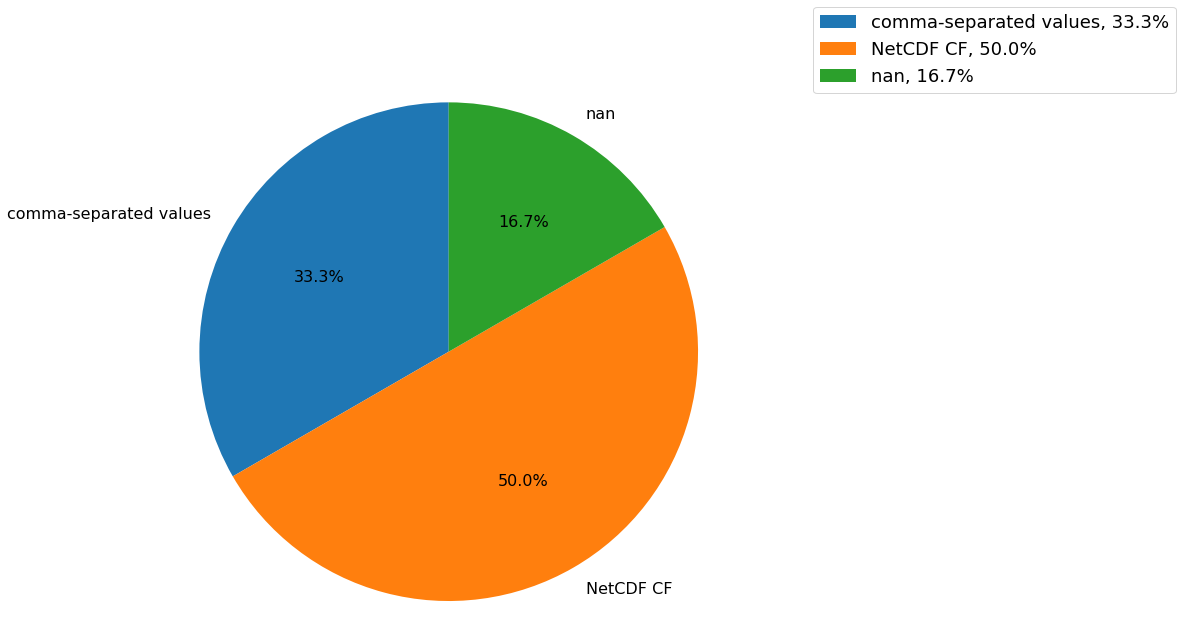

In [25]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?format_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasData [
           envri:hasPreferredFormat [
             envri:hasFormatName [ rdfs:label ?format_name ]
          ]
         ]
       ]
} 
# GROUP BY ?format_name
""")

# display(q)
write(q, 'output-6format.xlsx')

c = collections.Counter(q['format_name'])

display(pd.DataFrame.from_dict(dict(c), orient='index', columns=['count']))

c = {x : c[x] for x in c if c[x] >= 2}

labels = list(c.keys())
sizes = list(c.values())

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 16})
ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 18},
    bbox_to_anchor=(1, 1),
    bbox_transform=fig1.transFigure
)

fig = plt.gcf()
fig.set_size_inches(10,10) # or (4,4) or (5,5) or whatever
plt.show()

In [26]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?ri_domain ?rep_label ?dataschema WHERE {
    ?ri a rm:ResearchInfrastructure .
    ?ri envri:acronym ?ri_acronym . 
    ?ri envri:hasDomain [ rdf:li [ rdfs:label ?ri_domain ] ] .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:hasData ?data .
    ?data a wd:Q42848 .
    ?data envri:dataSchemaIsRegistered [ rdf:li [ rdfs:label ?dataschema ] ] 
}
""")

display(q)



,ri_acronym,ri_domain,rep_label,dataschema


,count
PROV-O,1
ICOS,1
Darwin Core,1
ANAEETHES,1
http://envri.eu/ns/NULL,1
EnvThes,3
CF standard names,1
LW Endemisms,1
LW MacroZooBenthos Traits,1
LW MacroAlgae,1


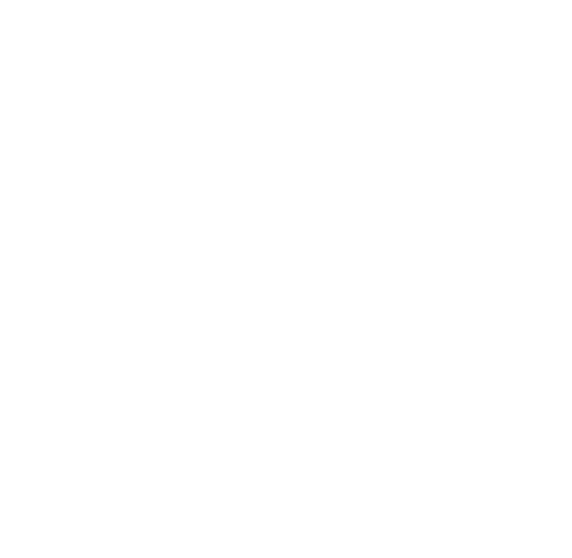

In [27]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?rep_label ?vocab_name ?vocab_iri WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasVocabularies [
           envri:hasName ?vocab_name ;
           envri:hasVocabularyIri ?vocab_iri 
         ]
       ]
}
#group by ?vocab_name
""")

#display(q)
write(q, 'vocab.xlsx')


c = collections.Counter(q['vocab_name'])
display(pd.DataFrame.from_dict(dict(c), orient='index', columns=['count']))

c = {x : c[x] for x in c if c[x] >= 4}

labels = list(c.keys())
sizes = list(c.values())

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 16})
ax1.axis('equal')

#total = sum(sizes)
#plt.legend(
#    loc='upper left',
#    labels=['%s, %1.1f%%' % (
#        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
#    prop={'size': 11},
#    bbox_to_anchor=(1, 1),
#    bbox_transform=fig1.transFigure
#)

fig = plt.gcf()
fig.set_size_inches(10,10) # or (4,4) or (5,5) or whatever
plt.show()

In [28]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?rep_label ?id_system ?id_provider WHERE {
    ?ri a rm:ResearchInfrastructure . 
    ?ri envri:acronym ?ri_acronym .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:usesIdentifier ?id .
    ?id a wd:Q853614 .
    ?id envri:usesIdentifierSystem [ rdfs:label ?id_system ] .
    ?id envri:usesProvider [ rdfs:label ?id_provider]
}
""")

display(q)

write(q, 'id_kind.xlsx')
#    ?id a [rdfs:label ?id_kind] . 
 #   ?ri envri:hasDomain [ rdf:li [ rdfs:label ?ri_domain ] ] .


,ri_acronym,rep_label,id_system,id_provider
0,eLTER,EUDAT/FZJ B2SHARE,handle,handle
1,ICOS,Carbon Portal,DOI,DataCite
2,eLTER,eLTER CDN,NaN,NaN
3,SIOS,norwegian Meteorological Institute,UUID,void type
4,ICOS,Carbon Portal,handle,PDC
5,SIOS,norwegian Polar Data Centre,UUID-DOI,DataCite
6,ANAEE-France,ANAEE-France Metadata Catalog,NaN,NaN
7,LifeWatch,LifeWatch Italy Portal,NaN,planned
8,eLTER,DEIMS-SDR,local system,Local service


,count
PID,5
identifier,9
local ID,3
NaN,1


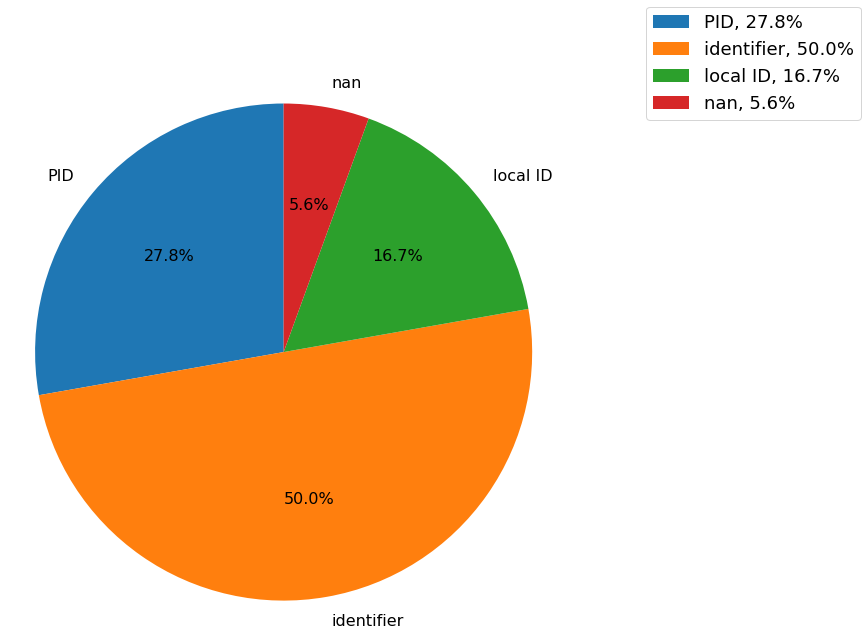

In [29]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>
SELECT ?id_kind WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
          envri:usesIdentifier [
             rdf:type [rdfs:label ?id_kind 
             ]
          ]
        ]  
} 
# GROUP BY ?id_kind
""")

#display(q)

c = collections.Counter(q['id_kind'])

display(pd.DataFrame.from_dict(dict(c), orient='index', columns=['count']))

c = {x : c[x] for x in c if c[x] >= 1}

labels = list(c.keys())
sizes = list(c.values())

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 16})
ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 18},
    bbox_to_anchor=(1, 1),
    bbox_transform=fig1.transFigure
)

fig = plt.gcf()
fig.set_size_inches(10,10) # or (4,4) or (5,5) or whatever
plt.show()

In [30]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?rep_label ?id_system ?id_provider WHERE {
    ?ri a rm:ResearchInfrastructure . 
    ?ri envri:acronym ?ri_acronym .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:usesIdentifier ?id .
    ?id a wd:Q853614 .
    ?id envri:usesIdentifierSystem ?id_system .
    ?id envri:usesProvider ?id_provider
}
""")

display(q)


,ri_acronym,rep_label,id_system,id_provider
0,eLTER,EUDAT/FZJ B2SHARE,https://www.wikidata.org/entity/Q1575058,https://www.wikidata.org/entity/Q1575058
1,ICOS,Carbon Portal,https://www.wikidata.org/entity/Q25670,https://www.wikidata.org/entity/Q58333293
2,eLTER,eLTER CDN,http://envri.eu/ns/NULL,http://envri.eu/ns/NULL
3,SIOS,norwegian Meteorological Institute,https://www.wikidata.org/entity/Q195284,https://www.wikidata.org/entity/Q513000
4,ICOS,Carbon Portal,https://www.wikidata.org/entity/Q1575058,http://envri.eu/ns/PDC
5,SIOS,norwegian Polar Data Centre,http://envri.eu/ns/UUID-DOI,https://www.wikidata.org/entity/Q58333293
6,ANAEE-France,ANAEE-France Metadata Catalog,http://envri.eu/ns/NULL,http://envri.eu/ns/NULL
7,LifeWatch,LifeWatch Italy Portal,http://envri.eu/ns/NULL,http://envri.eu/ns/planned
8,eLTER,DEIMS-SDR,https://www.wikidata.org/entity/Q6664565,https://www.wikidata.org/entity/Q11412386


In [31]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?rep_label WHERE {
    ?ri a rm:ResearchInfrastructure . 
    ?ri envri:acronym ?ri_acronym .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label 
}
""")

display(q)
write(q, 'repos.xlsx')



,ri_acronym,rep_label
0,ICOS,Carbon Portal
1,ANAEE-France,ANAEE-France Metadata Catalog
2,SIOS,norwegian Meteorological Institute
3,eLTER,DEIMS-SDR
4,SIOS,norwegian Polar Data Centre
5,LifeWatch,LifeWatch Italy Portal
6,eLTER,EUDAT/FZJ B2SHARE
7,eLTER,eLTER CDN


In [32]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?rep_label ?domain ?repos_type WHERE {
    ?ri a rm:ResearchInfrastructure . 
    ?ri envri:acronym ?ri_acronym .
    ?ri envri:hasDomain ?ri_domain .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:usesIdentifier ?id .
    ?id a wd:Q853614 .
    ?id envri:usesIdentifierSystem [ rdfs:label ?id_system ] .
    ?id envri:usesProvider [ rdfs:label ?id_provider]
}
""")

display(q)

#write(q, 'id_kind.xlsx')

,ri_acronym,rep_label,domain,repos_type
0,eLTER,EUDAT/FZJ B2SHARE,NaN,NaN
1,ICOS,Carbon Portal,NaN,NaN
2,eLTER,eLTER CDN,NaN,NaN
3,SIOS,norwegian Meteorological Institute,NaN,NaN
4,ICOS,Carbon Portal,NaN,NaN
5,SIOS,norwegian Polar Data Centre,NaN,NaN
6,ANAEE-France,ANAEE-France Metadata Catalog,NaN,NaN
7,LifeWatch,LifeWatch Italy Portal,NaN,NaN
8,eLTER,DEIMS-SDR,NaN,NaN


In [33]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?rep_label ?metaData WHERE {
    ?ri a rm:ResearchInfrastructure . 
    ?ri envri:acronym ?ri_acronym .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:usesIdentifier ?id .
    ?id a wd:Q853614 .
    ?id envri:includesMetadataSchema [rdf:li [ rdfs:label ?metaData ] ]
}
order by ?rep_label
""")

display(q)

,ri_acronym,rep_label,metaData
0,LifeWatch,LifeWatch Italy Portal,ISO 19115/19139


In [35]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?rep_label ?metaData WHERE {
    ?ri a rm:ResearchInfrastructure . 
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:hasMetadata ?md .
    ?md hasMachineReadableDatasetMetadata ?metaData 
}
order by ?rep_label
""")

display(q)

ParseException: Expected {SelectQuery | ConstructQuery | DescribeQuery | AskQuery}, found '?'  (at char 461), (line:14, col:5)

In [36]:
 q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?rep_label ?metaSchema WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasMetaData [
           envri:hasSchema [
             envri:hasSchemaName [ rdfs:label ?metaSchema]
          ]
         ]
       ]
} 
""")
display(q)

,rep_label,metaSchema


In [37]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?rep_label ?metadataschema WHERE {
    ?ri a rm:ResearchInfrastructure .
    ?ri envri:acronym ?ri_acronym . 
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:hasMetadata ?metadata .
    ?metadata a wd:Q180160 .
    ?metadata envri:hasSchema [
    a envri:Schema ?schem
        envri:hasSchemaName [ rdf:li [ rdfs:label ?metadataschema ] ] 
        ]
}
""")

display(q)

q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?format_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasData [
           envri:hasPreferredFormat [
             envri:hasFormatName [ rdfs:label ?format_name ]
          ]
         ]
       ]
} 
# GROUP BY ?format_name
""")


# display(q)

ParseException: Expected {SelectQuery | ConstructQuery | DescribeQuery | AskQuery}, found '?'  (at char 538), (line:16, col:5)

In [38]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?ri_acronym ?rep_label ?schema_name WHERE {
    ?ri a rm:ResearchInfrastructure .
         ?ri envri:acronym ?ri_acronym ;
       envri:hasRepository [
         rdfs:label ?rep_label ;
         envri:hasMetadata [
           envri:hasSchema [
             envri:hasSchemaName [ rdfs:label ?schema_name ]
          ]
         ]
       ]
} 
""")

display(q)
write(q, 'metadataschema.xlsx')



,ri_acronym,rep_label,schema_name
0,ANAEE-France,ANAEE-France Metadata Catalog,Geographic Metadata XML
1,ANAEE-France,ANAEE-France Metadata Catalog,ISO 19115
2,SIOS,norwegian Polar Data Centre,GCMD-DIF
3,SIOS,norwegian Meteorological Institute,ISO 19115
4,ICOS,Carbon Portal,ISO 19115
5,ICOS,Carbon Portal,GeoDCAT
6,eLTER,DEIMS-SDR,SensorML
7,eLTER,DEIMS-SDR,Geographic Metadata XML
8,eLTER,DEIMS-SDR,INSPIRE EF
9,eLTER,DEIMS-SDR,ISO 19115


In [39]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?rep_label ?metaData WHERE {
    ?ri a rm:ResearchInfrastructure . 
    ?ri envri:acronym ?ri_acronym .
    ?ri envri:hasRepository ?rep .
    ?rep rdfs:label ?rep_label .
    ?rep envri:usesIdentifier ?id .
    ?id envri:includesMetadataSchema [rdf:li [ rdfs:label ?metaData ] ]
}
order by ?rep_label
""")

display(q)

q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?rep_label ?schema_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasMetadata [
           envri:hasSchema [
             envri:hasSchemaName [ rdfs:label ?schema_name ]
          ]
         ]
       ]
} 
""")

,ri_acronym,rep_label,metaData
0,LifeWatch,LifeWatch Italy Portal,ISO 19115/19139


In [40]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?rep_label ?rep_kind ?schema_name WHERE {
     [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         rdfs:label ?rep_label ;
         rdf:type [rdf:li [rdfs:label ?rep_kind ]] ;
         envri:hasMetadata [
           envri:hasSchema [
             envri:hasSchemaName [ rdfs:label ?schema_name ]
          ]
         ]
       ]
} 
""")

display(q)

,rep_label,rep_kind,schema_name


In [41]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?ri_acronym ?rep_label ?rep_kind WHERE {
     ?ri a rm:ResearchInfrastructure .
     ?ri envri:acronym ?ri_acronym .
     ?ri envri:hasRepository ?rep .
     ?rep rdfs:label ?rep_label .
     ?rep rdf:type  [rdfs:label ?rep_kind ]

FILTER (?rep_kind != "Repository")
} 

""")

display(q)
write(q, 'reposkind.xlsx')



,ri_acronym,rep_label,rep_kind
0,ANAEE-France,ANAEE-France Metadata Catalog,metadata repository
1,SIOS,norwegian Polar Data Centre,data repository
2,SIOS,norwegian Meteorological Institute,data repository
3,ICOS,Carbon Portal,metadata repository
4,ICOS,Carbon Portal,data repository
5,eLTER,eLTER CDN,data repository
6,eLTER,DEIMS-SDR,metadata repository
7,eLTER,EUDAT/FZJ B2SHARE,data repository
8,LifeWatch,LifeWatch Italy Portal,data repository
9,LifeWatch,LifeWatch Italy Portal,metadata repository


In [42]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?ri_acronym ?rep_label ?rep_register WHERE {
     ?ri a rm:ResearchInfrastructure .
     ?ri envri:acronym ?ri_acronym .
     ?ri envri:hasRepository ?rep .
     ?rep rdfs:label ?rep_label .
     ?rep envri:inRegistries [rdf:li [rdfs:label ?rep_register ]]


} 

""")

display(q)
write(q, 'reposregister.xlsx')

,ri_acronym,rep_label,rep_register
0,SIOS,norwegian Polar Data Centre,re3data
1,SIOS,norwegian Meteorological Institute,re3data
2,ICOS,Carbon Portal,re3data
3,eLTER,DEIMS-SDR,re3data
4,eLTER,EUDAT/FZJ B2SHARE,re3data


In [43]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?schema_name WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
           envri:hasSchema [
             envri:hasSchemaName  [rdfs:label ?schema_name]
           ]
         ]
}
""")

display(q)
write(q, 'metadataschema.xlsx')




,ri_acronym,rep_label,schema_name
0,ANAEE-France,ANAEE-France Metadata Catalog,Geographic Metadata XML
1,ANAEE-France,ANAEE-France Metadata Catalog,ISO 19115
2,SIOS,norwegian Polar Data Centre,GCMD-DIF
3,SIOS,norwegian Meteorological Institute,ISO 19115
4,ICOS,Carbon Portal,ISO 19115
5,ICOS,Carbon Portal,GeoDCAT
6,eLTER,DEIMS-SDR,SensorML
7,eLTER,DEIMS-SDR,Geographic Metadata XML
8,eLTER,DEIMS-SDR,INSPIRE EF
9,eLTER,DEIMS-SDR,ISO 19115


In [44]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?vocab_name WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasVocabularies [
               envri:hasName  ?vocab_name
           ]
}
""")

display(q)
write(q, 'vocabularies.xlsx')

,ri_acronym,rep_label,vocab_name
0,ANAEE-France,ANAEE-France Metadata Catalog,ANAEETHES
1,SIOS,norwegian Polar Data Centre,CF standard names
2,SIOS,norwegian Meteorological Institute,http://envri.eu/ns/NULL
3,ICOS,Carbon Portal,PROV-O
4,ICOS,Carbon Portal,ICOS
5,ICOS,Carbon Portal,Darwin Core
6,eLTER,eLTER CDN,EnvThes
7,eLTER,DEIMS-SDR,EnvThes
8,eLTER,EUDAT/FZJ B2SHARE,EnvThes
9,LifeWatch,LifeWatch Italy Portal,LW Endemisms


In [45]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?rep_label ?vocab_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasVocabularies [
           envri:hasName ?vocab_name ;
         ]
       ]
}
""")

display(q)
write(q, 'output-2.xlsx')

,rep_label,vocab_name
0,Carbon Portal,PROV-O
1,Carbon Portal,ICOS
2,Carbon Portal,Darwin Core
3,ANAEE-France Metadata Catalog,ANAEETHES
4,norwegian Meteorological Institute,http://envri.eu/ns/NULL
5,DEIMS-SDR,EnvThes
6,norwegian Polar Data Centre,CF standard names
7,LifeWatch Italy Portal,LW Endemisms
8,LifeWatch Italy Portal,LW MacroZooBenthos Traits
9,LifeWatch Italy Portal,LW MacroAlgae


In [46]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?schema_name WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
           envri:hasSchema [
             envri:hasSchemaName  [rdfs:label ?schema_name]
           ]
         ]
}
""")

display(q)
write(q, 'metadataschema.xlsx')

,ri_acronym,rep_label,schema_name
0,ANAEE-France,ANAEE-France Metadata Catalog,Geographic Metadata XML
1,ANAEE-France,ANAEE-France Metadata Catalog,ISO 19115
2,SIOS,norwegian Polar Data Centre,GCMD-DIF
3,SIOS,norwegian Meteorological Institute,ISO 19115
4,ICOS,Carbon Portal,ISO 19115
5,ICOS,Carbon Portal,GeoDCAT
6,eLTER,DEIMS-SDR,SensorML
7,eLTER,DEIMS-SDR,Geographic Metadata XML
8,eLTER,DEIMS-SDR,INSPIRE EF
9,eLTER,DEIMS-SDR,ISO 19115


In [47]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?prov WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
           envri:hasSchema [
             envri:includesProvenanceFields [rdf:li [rdfs:label ?prov]]
           ]
         ]
}
""")

display(q)
write(q, 'provinclud.xlsx')

,ri_acronym,rep_label,prov
0,ANAEE-France,ANAEE-France Metadata Catalog,text only
1,ANAEE-France,ANAEE-France Metadata Catalog,text only
2,SIOS,norwegian Meteorological Institute,text only
3,ICOS,Carbon Portal,text only
4,ICOS,Carbon Portal,simplified PROV-O
5,eLTER,DEIMS-SDR,text only
6,eLTER,DEIMS-SDR,text only
7,eLTER,DEIMS-SDR,text only
8,LifeWatch,LifeWatch Italy Portal,text only
9,LifeWatch,LifeWatch Italy Portal,text only


In [48]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?license WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasAccessMechanisms [
             envri:usesDataLicenses [rdf:li [rdfs:label ?license]]
         ]
}
""")

display(q)
write(q, 'usagelicense.xlsx')

,ri_acronym,rep_label,license
0,SIOS,norwegian Polar Data Centre,Creative Commons Attribution 4.0 International
1,SIOS,norwegian Meteorological Institute,Creative Commons Attribution 4.0 International
2,ICOS,Carbon Portal,Creative Commons Attribution 4.0 International
3,eLTER,DEIMS-SDR,Creative Commons Attribution-NonCommercial 4.0 License
4,LifeWatch,LifeWatch Italy Portal,Creative Commons Attribution 4.0 International


In [49]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?data_schema WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasData [
               envri:dataSchemaIsRegistered  [rdf:li [rdfs:label ?data_schema]]
           ]
}
""")

display(q)
write(q, 'data_schema.xlsx')

,ri_acronym,rep_label,data_schema


In [50]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?categories WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
             envri:categoriesAreDefinedInRegistries ?categories
           ]
         
}
""")

display(q)
write(q, 'categories.xlsx')

,ri_acronym,rep_label,categories
0,ANAEE-France,ANAEE-France Metadata Catalog,true
1,SIOS,norwegian Polar Data Centre,http://envri.eu/ns/none
2,SIOS,norwegian Meteorological Institute,http://envri.eu/ns/none
3,ICOS,Carbon Portal,true
4,eLTER,DEIMS-SDR,partially
5,LifeWatch,LifeWatch Italy Portal,true


In [51]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?metadataformat WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
             envri:hasPrimaryStorageFormat [rdfs:label ?metadataformat]
           ]
         
}
""")

display(q)
write(q, 'metadataformat.xlsx')

,ri_acronym,rep_label,metadataformat
0,ANAEE-France,ANAEE-France Metadata Catalog,Extensible Markup Language
1,SIOS,norwegian Polar Data Centre,JavaScript Object Notation
2,SIOS,norwegian Meteorological Institute,Extensible Markup Language
3,ICOS,Carbon Portal,Resource Description Framework
4,eLTER,DEIMS-SDR,DEIMS-SDR
5,LifeWatch,LifeWatch Italy Portal,relational database


In [52]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?metadataexportformat WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
             envri:supportedExportFormats [rdf:li [rdfs:label ?metadataexportformat]]
           ]
         
}
""")

display(q)
write(q, 'metadataexportformat.xlsx')

,ri_acronym,rep_label,metadataexportformat
0,ANAEE-France,ANAEE-France Metadata Catalog,Resource Description Framework
1,ANAEE-France,ANAEE-France Metadata Catalog,Extensible Markup Language
2,ANAEE-France,ANAEE-France Metadata Catalog,Portable Document Format
3,SIOS,norwegian Polar Data Centre,JSON-LD
4,SIOS,norwegian Polar Data Centre,Extensible Markup Language
5,SIOS,norwegian Meteorological Institute,Extensible Markup Language
6,ICOS,Carbon Portal,HyperText Markup Language
7,ICOS,Carbon Portal,Extensible Markup Language
8,ICOS,Carbon Portal,plain text
9,ICOS,Carbon Portal,JavaScript Object Notation


In [53]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?metadataharvesting WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
             envri:hasHarvestingMethods [rdf:li [rdfs:label ?metadataharvesting]]
           ]
         
}
""")

display(q)
write(q, 'metadataharvestingmethods.xlsx')

,ri_acronym,rep_label,metadataharvesting
0,ANAEE-France,ANAEE-France Metadata Catalog,Catalog Service for the Web
1,ANAEE-France,ANAEE-France Metadata Catalog,OAI PMH
2,ANAEE-France,ANAEE-France Metadata Catalog,OAI-PMH
3,SIOS,norwegian Polar Data Centre,OAI PMH
4,SIOS,norwegian Polar Data Centre,OAI-PMH
5,SIOS,norwegian Meteorological Institute,OAI PMH
6,SIOS,norwegian Meteorological Institute,OAI-PMH
7,ICOS,Carbon Portal,SPARQL endpoint
8,eLTER,DEIMS-SDR,OAI PMH
9,eLTER,DEIMS-SDR,OAI-PMH


In [54]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?open WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasAccessMechanisms [
             envri:openAccessMetadata ?open
         ]
}
""")

display(q)
write(q, 'open.xlsx')


,ri_acronym,rep_label,open
0,ANAEE-France,ANAEE-France Metadata Catalog,True
1,SIOS,norwegian Polar Data Centre,True
2,SIOS,norwegian Meteorological Institute,True
3,ICOS,Carbon Portal,True
4,eLTER,eLTER CDN,True
5,eLTER,DEIMS-SDR,True
6,eLTER,EUDAT/FZJ B2SHARE,True
7,LifeWatch,LifeWatch Italy Portal,True


In [55]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?long WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
             envri:hasMetadataLongevityPlan ?long
         ]
}
""")

display(q)
write(q, 'long.xlsx')

,ri_acronym,rep_label,long
0,ANAEE-France,ANAEE-France Metadata Catalog,https://www.wikidata.org/entity/Q513000
1,SIOS,norwegian Polar Data Centre,http://envri.eu/ns/NULL
2,SIOS,norwegian Meteorological Institute,https://sios-svalbard.org/sites/sios.metsis.met.no/files/common/SIOS_Data_Management_Plan_20170428_ToBeApproved.pdf
3,ICOS,Carbon Portal,https://meta.icos-cp.eu/objects/5stgMTshDNdDe_Y8obQOpe0u
4,eLTER,DEIMS-SDR,http://envri.eu/ns/NULL
5,LifeWatch,LifeWatch Italy Portal,http://envri.eu/ns/planned
